In [1]:
# Reel Getiri: Enflasyondan arındırılmış getiri

# Enflasyon = (Tüfe(t) / Tüfe(t-1)) - 1

# Reel Getiri = ((1 + Nominal Getiri) / (1 + Enflasyon)) - 1

In [12]:
import yfinance as yf
import pandas as pd
import evds as e
import matplotlib.pyplot as plt

In [3]:
data = yf.download("XU100.IS", period = "2Y", interval = "1mo")[["Close"]]

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

,Close
Date,
2022-02-01,1946.199951
2022-03-01,2233.300049
2022-04-01,2430.600098
2022-05-01,2547.100098
2022-06-01,2405.399902


In [5]:
data.tail()

,Close
Date,
2023-09-01,8334.900391
2023-10-01,7514.100098
2023-11-01,7948.600098
2023-12-01,7470.200195
2024-01-01,8165.620117


In [6]:
data = data.drop("2024-01-01")
data.tail()

,Close
Date,
2023-08-01,7917.899902
2023-09-01,8334.900391
2023-10-01,7514.100098
2023-11-01,7948.600098
2023-12-01,7470.200195


In [7]:
with open ("api_key.txt", "r") as f:
    api_key = f.read()

In [8]:
evds = e.evdsAPI(api_key)
tufe = evds.get_data(["TP.FG.J0"], startdate = "01-02-2022", enddate = "01-01-2024")
print(tufe)

      Tarih  TP_FG_J0
0    2022-2    799.93
1    2022-3    843.64
2    2022-4    904.79
3    2022-5    931.76
4    2022-6    977.90
5    2022-7   1001.03
6    2022-8   1015.65
7    2022-9   1046.89
8   2022-10   1084.00
9   2022-11   1115.26
10  2022-12   1128.45
11   2023-1   1203.48
12   2023-2   1241.33
13   2023-3   1269.75
14   2023-4   1300.04
15   2023-5   1300.60
16   2023-6   1351.59
17   2023-7   1479.84
18   2023-8   1614.31
19   2023-9   1691.04
20  2023-10   1749.11
21  2023-11   1806.50
22  2023-12   1859.38


In [9]:
data["Tüfe"] = tufe["TP_FG_J0"].to_list()
data.head()

,Close,Tüfe
Date,,
2022-02-01,1946.199951,799.93
2022-03-01,2233.300049,843.64
2022-04-01,2430.600098,904.79
2022-05-01,2547.100098,931.76
2022-06-01,2405.399902,977.90


In [10]:
data["Nominal Getiri"] = data["Close"].pct_change()
data["Enflasyon"] = data["Tüfe"].pct_change()
data.head()

,Close,Tüfe,Nominal Getiri,Enflasyon
Date,,,,
2022-02-01,1946.199951,799.93,NaN,NaN
2022-03-01,2233.300049,843.64,0.147518,0.054642
2022-04-01,2430.600098,904.79,0.088345,0.072484
2022-05-01,2547.100098,931.76,0.047931,0.029808
2022-06-01,2405.399902,977.90,-0.055632,0.049519


In [11]:
data["Reel Getiri"] = ((1 + data["Nominal Getiri"]) / (1 + data["Enflasyon"])) - 1

data.head(10)

,Close,Tüfe,Nominal Getiri,Enflasyon,Reel Getiri
Date,,,,,
2022-02-01,1946.199951,799.93,NaN,NaN,NaN
2022-03-01,2233.300049,843.64,0.147518,0.054642,0.088064
2022-04-01,2430.600098,904.79,0.088345,0.072484,0.014789
2022-05-01,2547.100098,931.76,0.047931,0.029808,0.017598
2022-06-01,2405.399902,977.90,-0.055632,0.049519,-0.100190
2022-07-01,2592.399902,1001.03,0.077742,0.023653,0.052839
2022-08-01,3171.199951,1015.65,0.223268,0.014605,0.205659
2022-09-01,3180.000000,1046.89,0.002775,0.030759,-0.027149
2022-10-01,3979.000000,1084.00,0.251258,0.035448,0.208422


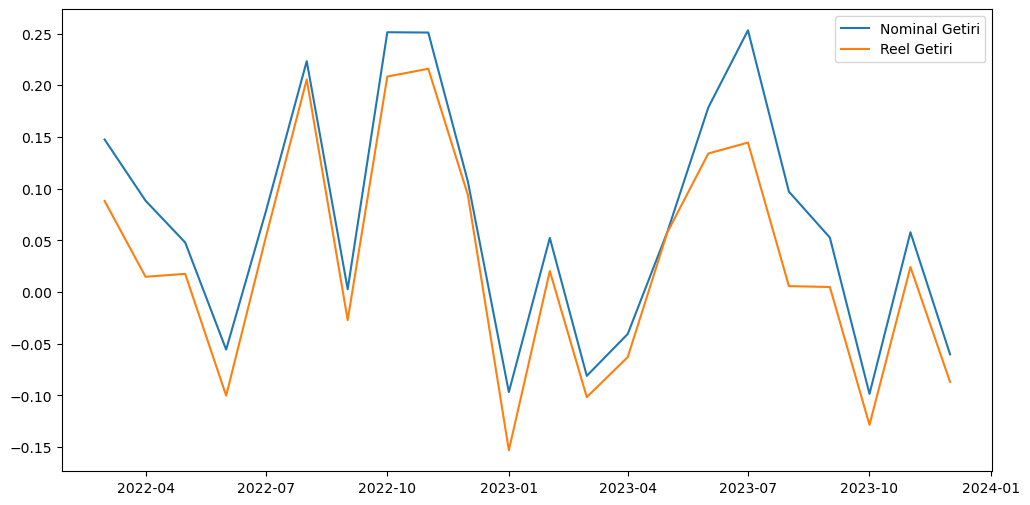

In [13]:
plt.figure(figsize = (12,6))
plt.plot(data.iloc[1:, 2], label = "Nominal Getiri")
plt.plot(data.iloc[1:, 4], label = "Reel Getiri")
plt.legend()
plt.show();